In [ ]:
pip install faiss-cpu transformers torch torchvision


In [2]:
import faiss
import torch
import json
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from torchvision import models, transforms
from PIL import Image
import numpy as np
import os
import pickle
from IPython.display import display

In [3]:
image_dir=r"D:\Sem7-project-folders\augmented_dataset\augmented_dataset"
json_path=r"D:\phase2\aj-sanskrit\aj-sanskrit\description_sanskrit.json"
for_displaying_image=r"D:\phase2\aj-sanskrit\aj-sanskrit\saved-images"

In [4]:
# Ensure correct formatting of the FAISS index path
faiss_index_path = r"D:\phase2\aj-sanskrit\aj-sanskrit\Karana_sanskrit.index"

metadata_path = r"D:\phase2\aj-sanskrit\aj-sanskrit\metadata_sanskrit.pth"

In [5]:
text_model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

In [6]:
index = faiss.read_index(faiss_index_path)
metadata = torch.load(metadata_path, map_location="cpu")

In [7]:
# Function to convert a query text to an embedding
def query_to_embedding(query_text):

    inputs = tokenizer(query_text, return_tensors="pt", max_length=512, truncation=True)
    with torch.no_grad():
        query_embedding = text_model(**inputs).last_hidden_state.mean(dim=1).squeeze().numpy()
    
    return query_embedding

Closest Text Index: 3
Retrieved Path from Metadata: D:\Sem7-project-folders\augmented_dataset\augmented_dataset\Valitorukam\img1.jpg
Rank 1: Image Location: D:/Sem7-project-folders/augmented_dataset/augmented_dataset/Valitorukam/img1.jpg, Distance: 5.838140487670898


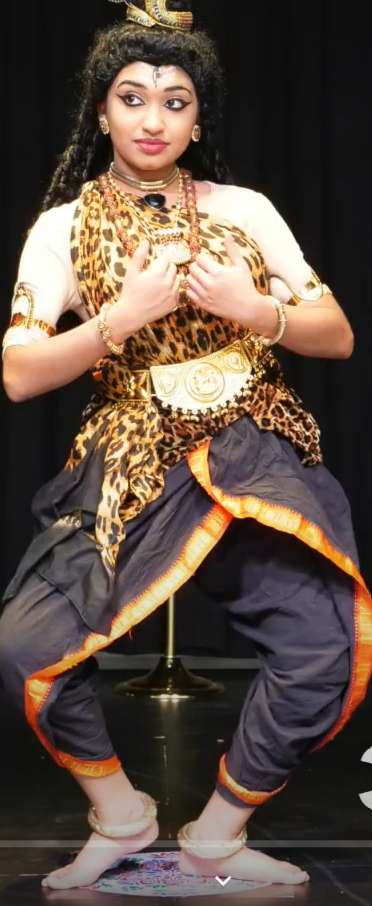

Closest Text Index: 44
Retrieved Path from Metadata: D:\Sem7-project-folders\augmented_dataset\augmented_dataset\Lataavrishchikam/img1.jpg
Rank 2: Image Location: D:/Sem7-project-folders/augmented_dataset/augmented_dataset/Lataavrishchikam/img1.jpg, Distance: 20.237651824951172


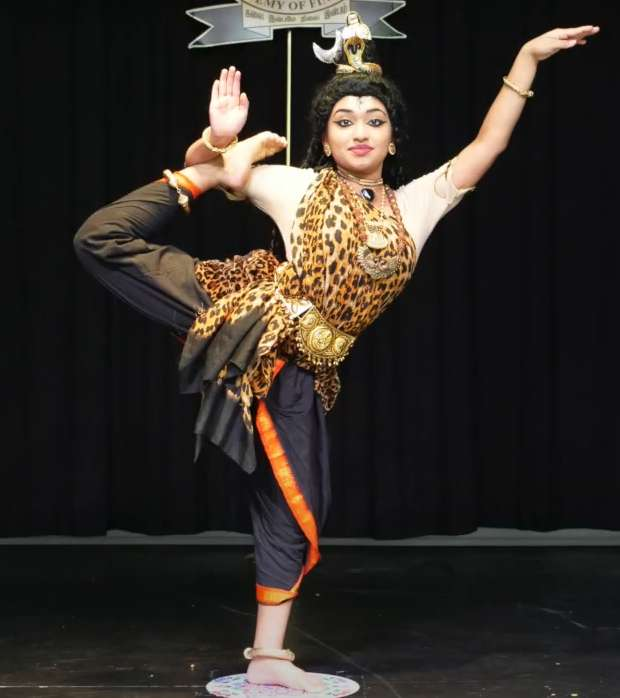

Closest Text Index: 0
Retrieved Path from Metadata: D:\Sem7-project-folders\augmented_dataset\augmented_dataset\Talapushpaputam\img1.jpg
Rank 3: Image Location: D:/Sem7-project-folders/augmented_dataset/augmented_dataset/Talapushpaputam/img1.jpg, Distance: 20.392818450927734


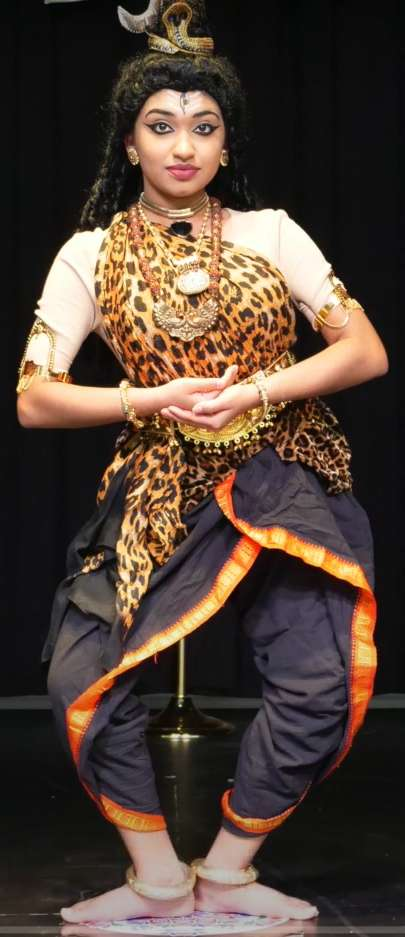

In [43]:
def retrieve_top_images_from_text(query_text, k=3):
    
    query_embedding = query_to_embedding(query_text)

    D, I = index.search(query_embedding.reshape(1, -1), k=k)

    for rank in range(k):
        closest_text_index = I[0][rank]  # Get the index of the current closest match
        print(f"Closest Text Index: {closest_text_index}")
        distance = D[0][rank]  # Get the corresponding distance score

        relative_path = metadata[closest_text_index]
        print(f"Retrieved Path from Metadata: {relative_path}")

        closest_image_path = os.path.join(image_dir, relative_path).replace("\\", "/")
        print(f"Rank {rank + 1}: Image Location: {closest_image_path}, Distance: {distance}")

        if os.path.exists(closest_image_path):
            image = Image.open(closest_image_path)
            display(image)  # Display the image inline
        else:
            print(f"Image not found: {closest_image_path}")

query = "समन्नतरश्चवसौष्ठवनामतभ्द्वत|"
retrieve_top_images_from_text(query)
